In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.style.use('ggplot')


In [5]:
data = pd.read_csv('data_182.csv')

In [6]:
data

,date,currency,digital_code,letter_code,rate
0,1924-01-01,Доллар США,840.0,USD,2.200000
1,1924-01-01,Фунт стерлингов Соединенного королевства,826.0,GBP,9.400000
2,1924-01-01,Шведская крона,752.0,SEK,0.550000
3,1924-02-01,Доллар США,840.0,USD,2.170000
4,1924-02-01,Фунт стерлингов Соединенного королевства,826.0,GBP,9.240000
...,...,...,...,...,...
321513,2021-11-01,Чешская крона,203.0,CZK,3.205160
321514,2021-11-01,Шведская крона,752.0,SEK,8.275440
321515,2021-11-01,Швейцарский франк,756.0,CHF,77.341500
321516,2021-11-01,Южноафриканский рэнд,710.0,ZAR,4.617300


In [20]:
data[data['letter_code'] == "JPY"]

,date,currency,digital_code,letter_code,rate
622,1930-10-01,Японская иена,392.0,JPY,0.964100
638,1930-11-01,Японская иена,392.0,JPY,0.966200
654,1930-12-01,Японская иена,392.0,JPY,0.964400
670,1931-01-01,Японская иена,392.0,JPY,0.965600
686,1931-02-03,Японская иена,392.0,JPY,0.963400
...,...,...,...,...,...
321381,2021-10-28,Японская иена,392.0,JPY,0.613745
321415,2021-10-29,Японская иена,392.0,JPY,0.620808
321449,2021-10-30,Японская иена,392.0,JPY,0.620283
321483,2021-10-31,Японская иена,392.0,JPY,0.620283


## Общая информация о данных

In [21]:
data.shape

(321518, 5)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321518 entries, 0 to 321517
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          321518 non-null  object 
 1   currency      321518 non-null  object 
 2   digital_code  315083 non-null  float64
 3   letter_code   315083 non-null  object 
 4   rate          321518 non-null  float64
dtypes: float64(2), object(3)
memory usage: 12.3+ MB


In [23]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,321518,12040,1999-07-01,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
currency,321518,68,Доллар США,11820,NaN,NaN,NaN,NaN,NaN,NaN,NaN
digital_code,315083.0,NaN,NaN,NaN,576.27289,317.099028,31.0,348.0,578.0,860.0,986.0
letter_code,315083,57,USD,11820,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rate,321518.0,NaN,NaN,NaN,260.499182,1045.475004,0.000005,0.753352,9.556365,38.9567,10154.55


In [17]:
data[data['letter_code'] == "USD"]['rate'].describe()

count    11820.000000
mean       580.719688
std       1493.847317
min          0.545000
25%         27.669950
50%         31.132500
75%         65.803525
max       5960.000000
Name: rate, dtype: float64

## Анализ количественной информации

Для отображения зависимостей используется курс по отношению к фунту стерлингу Соединённого Королевства

<AxesSubplot: >

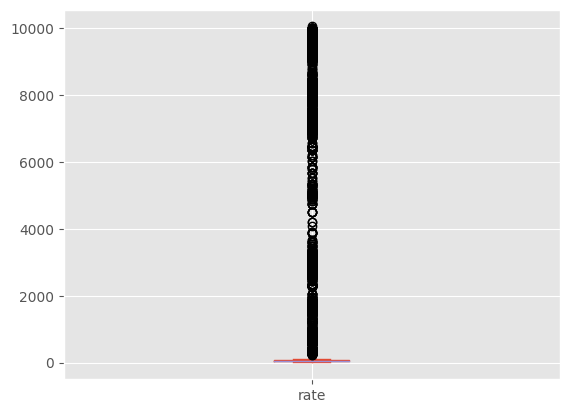

In [59]:
data[data['letter_code'] == "GBP"]['rate'].plot(kind='box')

In [30]:
IQR = np.quantile(data[data['letter_code'] == "GBP"]['rate'],0.75) - np.quantile(data[data['letter_code'] == "GBP"]['rate'],0.25)

In [31]:
IQR

42.528225000000006

In [33]:
np.quantile(data[data['letter_code'] == "GBP"]['rate'],0.75),np.quantile(data[data['letter_code'] == "GBP"]['rate'],0.25)

(87.830725, 45.302499999999995)

In [35]:
data[data['letter_code'] == "GBP"]['rate'].min(),data[data['letter_code'] == "GBP"]['rate'].max()

(0.9606, 10060.35)

In [36]:
data[data['letter_code'] == "GBP"]['rate'].plot

<AxesSubplot: >

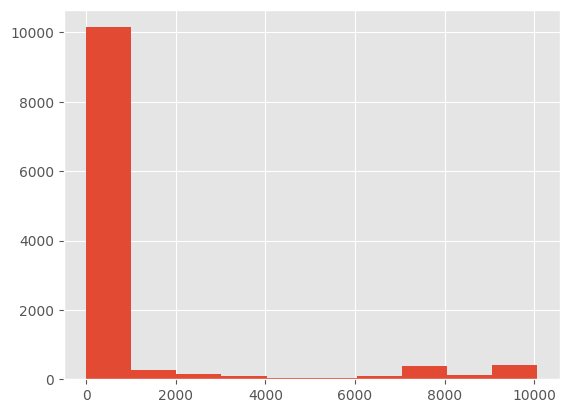

In [37]:
data[data['letter_code'] == "GBP"]['rate'].hist()

In [39]:
data[data['letter_code'] == "GBP"]['rate'].value_counts()

11.2000    130
21.3600     53
2.5200      38
21.3800     33
2.5100      28
          ... 
52.2627      1
52.3267      1
52.6391      1
52.7828      1
51.3558      1
Name: rate, Length: 7051, dtype: int64

## Анализ качественной информации

Пример отображения количества позиций с разными видами валют по их банковскому коду

<AxesSubplot: xlabel='count', ylabel='letter_code'>

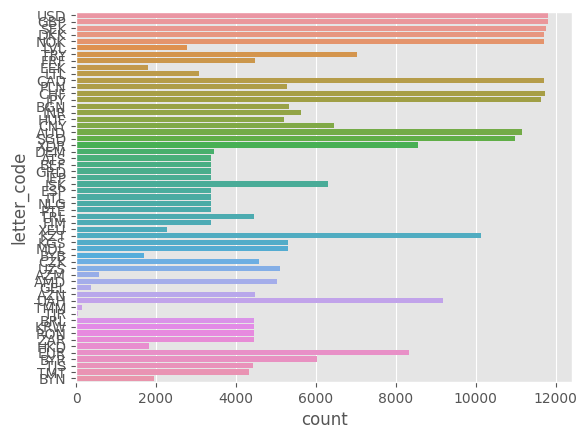

In [54]:
sns.countplot(y = 'letter_code', data = data, orient = "h")

## Вывод

Данный датасет, предоставленный Центральным Банком Российской Федерации, содержит в себе информацию об изменении стоимости различных мировых валют по отношению к рублю в течение периода с 1924 года по 2021 год. Данные, содержащиеся в датасете, могут быть полезны для прогностической деятельности и вычисления будущих изменений курса той или иной валюты. Единственный минус датасета — его ограниченность 2021 годом, т.е. не учитываются события 2022 года, повлекшие за собой изменения положения рубля по отношению к мировым валютам.